# Notebook to read a dataset and do basic field statistics and distributions

In [48]:
import pandas as pd
import scipy.stats
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

%matplotlib inline
start_time = dt.datetime.now()
print('LOAD DURATION: ', dt.datetime.now() - start_time)

LOAD DURATION:  0:00:00.000080


In [50]:
%%time
data = pd.read_csv('card transactions.csv')

CPU times: user 69.9 ms, sys: 16.9 ms, total: 86.8 ms
Wall time: 90.4 ms


In [51]:
data.dropna(how='all', axis=1, inplace=True) # drop any empty columns
print('data.shape=',data.shape)
print(data.info())
data.head().transpose()

data.shape= (97852, 10)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97852 entries, 0 to 97851
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Recnum             97852 non-null  int64  
 1   Cardnum            97852 non-null  int64  
 2   Date               97852 non-null  object 
 3   Merchnum           94455 non-null  object 
 4   Merch description  97852 non-null  object 
 5   Merch state        96649 non-null  object 
 6   Merch zip          93149 non-null  float64
 7   Transtype          97852 non-null  object 
 8   Amount             97852 non-null  float64
 9   Fraud              97852 non-null  int64  
dtypes: float64(2), int64(3), object(5)
memory usage: 7.5+ MB
None


,0,1,2,3,4
Recnum,1,2,3,4,5
Cardnum,5142190439,5142183973,5142131721,5142148452,5142190439
Date,1/1/10,1/1/10,1/1/10,1/1/10,1/1/10
Merchnum,5509006296254,61003026333,4503082993600,5509006296254,5509006296254
Merch description,FEDEX SHP 12/23/09 AB#,SERVICE MERCHANDISE #81,OFFICE DEPOT #191,FEDEX SHP 12/28/09 AB#,FEDEX SHP 12/23/09 AB#
Merch state,TN,MA,MD,TN,TN
Merch zip,38118.0,1803.0,20706.0,38118.0,38118.0
Transtype,P,P,P,P,P
Amount,3.62,31.42,178.49,3.62,3.62
Fraud,0,0,0,0,0


In [52]:
data.tail().transpose()

,97847,97848,97849,97850,97851
Recnum,97848,97849,97850,97851,97852
Cardnum,5142276053,5142225701,5142226486,5142244619,5142243247
Date,12/31/10,12/31/10,12/31/10,12/31/10,12/31/10
Merchnum,3500000006160,8090710030950,4503057341100,8834000695412,9108347680006
Merch description,BEST BUY 00001610,MARKUS OFFICE SUPPLIES,"TECH PAC, INC",BUY.COM,STAPLES NATIONAL #471
Merch state,KY,OH,OH,CA,NJ
Merch zip,41042.0,45248.0,45150.0,92656.0,7606.0
Transtype,P,P,P,P,P
Amount,84.79,118.75,363.56,2202.03,554.64
Fraud,0,0,0,0,0


In [53]:
# add a dummy categorical column for the case the fields all look numeric
data['dummy'] = 'temp'

In [54]:
df_stats = pd.DataFrame(data.count(),columns=['count'])
df_stats['isna'] = data.isna().sum()
df_stats['% pop'] = 1 - data.isna().sum()/len(data)
df_stats

,count,isna,% pop
Recnum,97852,0,1.000000
Cardnum,97852,0,1.000000
Date,97852,0,1.000000
Merchnum,94455,3397,0.965284
Merch description,97852,0,1.000000
Merch state,96649,1203,0.987706
Merch zip,93149,4703,0.951938
Transtype,97852,0,1.000000
Amount,97852,0,1.000000
Fraud,97852,0,1.000000


In [55]:
data.describe(include = 'all').transpose()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Recnum,97852.0,NaN,NaN,NaN,48926.5,28247.583608,1.0,24463.75,48926.5,73389.25,97852.0
Cardnum,97852.0,NaN,NaN,NaN,5142201749.891356,55560.78661,5142110002.0,5142152067.0,5142195612.0,5142245485.0,5142847398.0
Date,97852,365,2/28/10,684,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Merchnum,94455,13091,930090121224,9419,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Merch description,97852,13126,GSA-FSS-ADV,1706,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Merch state,96649,227,TN,12169,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Merch zip,93149.0,NaN,NaN,NaN,44684.186368,28371.722354,1.0,20855.0,38118.0,63103.0,99999.0
Transtype,97852,4,P,97497,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Amount,97852.0,NaN,NaN,NaN,425.466438,9949.850694,0.01,33.38,137.4,425.82,3102045.53
Fraud,97852.0,NaN,NaN,NaN,0.020919,0.143115,0.0,0.0,0.0,0.0,1.0


### Make best guess to automatically set numerics or categoricals

In [56]:
df = data.describe(include='all')
frac_unique = df.loc['unique']/ df.loc['count']
s1 = frac_unique.isna()
s2 = np.where(s1)[0]
s3 = np.where(s1 == False)[0]
numerics = data.columns[s2].tolist()
categoricals = data.columns[s3].tolist()

for col in data.columns:
    numunique = data[col].nunique()
    if numunique == len(data) or numunique <=6: # adjust this upper limit for data set
            print(col)
            if col in numerics:
                numerics.remove(col)
                categoricals.extend([col])

# manually switch fields some if desired.          
switch_num2cat = []
switch_cat2num = []
numerics = [s for s in numerics if s not in switch_num2cat]
categoricals = [s for s in categoricals if s not in switch_cat2num]
numerics.extend(switch_cat2num)
categoricals.extend(switch_num2cat)
categoricals.remove('dummy')
            
print('numerics:',numerics)     
print('\ncategoricals:',categoricals)     

Recnum
Transtype
Fraud
dummy
numerics: ['Cardnum', 'Merch zip', 'Amount']

categoricals: ['Date', 'Merchnum', 'Merch description', 'Merch state', 'Transtype', 'Recnum', 'Fraud']


In [57]:
data

,Recnum,Cardnum,Date,Merchnum,Merch description,Merch state,Merch zip,Transtype,Amount,Fraud,dummy
0,1,5142190439,1/1/10,5509006296254,FEDEX SHP 12/23/09 AB#,TN,38118.0,P,3.62,0,temp
1,2,5142183973,1/1/10,61003026333,SERVICE MERCHANDISE #81,MA,1803.0,P,31.42,0,temp
2,3,5142131721,1/1/10,4503082993600,OFFICE DEPOT #191,MD,20706.0,P,178.49,0,temp
3,4,5142148452,1/1/10,5509006296254,FEDEX SHP 12/28/09 AB#,TN,38118.0,P,3.62,0,temp
4,5,5142190439,1/1/10,5509006296254,FEDEX SHP 12/23/09 AB#,TN,38118.0,P,3.62,0,temp
...,...,...,...,...,...,...,...,...,...,...,...
97847,97848,5142276053,12/31/10,3500000006160,BEST BUY 00001610,KY,41042.0,P,84.79,0,temp
97848,97849,5142225701,12/31/10,8090710030950,MARKUS OFFICE SUPPLIES,OH,45248.0,P,118.75,0,temp
97849,97850,5142226486,12/31/10,4503057341100,"TECH PAC, INC",OH,45150.0,P,363.56,0,temp
97850,97851,5142244619,12/31/10,8834000695412,BUY.COM,CA,92656.0,P,2202.03,0,temp


In [58]:
def count_zeros(data):
    count = 0
    for i in data:
        if i == 0:
            count += 1
    return count

In [59]:
statistics_of_data1 = []
for col in numerics:
    num_zeros = count_zeros(data[col])
    percent_zeros = num_zeros / data.shape[0] * 100
    statistics_of_data1.append((col,
                             'numeric',
                             data[col].notnull().sum(),
                             f'{data[col].notnull().sum()/data.shape[0]*100:.1f}%',
#                              f'{percent_zeros:.2f}%',  # convert to percentage with 2 decimal places
                             count_zeros(data[col]),
                             round(data[col].min(), 2),
                             round(data[col].max(), 2),
                             data[col].mean(),
                             round(np.std(data[col]), 2),
                             data[col].mode()[0]
                             ))

stats_dfnum = pd.DataFrame(statistics_of_data1, columns = ['Field Name', 'Field Type','# Records Have Values', '% Populated', '# Zeros', 'Min', 'Max', 'Mean', 'Standard Deviation', 'Most Common'])
stats_dfnum.to_excel('numerics table.xlsx', index=False)
stats_dfnum

,Field Name,Field Type,# Records Have Values,% Populated,# Zeros,Min,Max,Mean,Standard Deviation,Most Common
0,Cardnum,numeric,97852,100.0%,0,5.142110e+09,5.142847e+09,5.142202e+09,55560.50,5.142148e+09
1,Merch zip,numeric,93149,95.2%,0,1.000000e+00,9.999900e+04,4.468419e+04,28371.57,3.811800e+04
2,Amount,numeric,97852,100.0%,0,1.000000e-02,3.102046e+06,4.254664e+02,9949.80,3.620000e+00


In [60]:
statistics_of_data = []
for col in categoricals:
    statistics_of_data.append((col,
                             'categorical',
                             data[col].notnull().sum(),
                             f'{data[col].notnull().sum()/data.shape[0]*100:.1f}%',
                             count_zeros(data[col]),
                             data[col].nunique(),
                             data[col].mode()[0]
                            
                             ))
stats_dfcat = pd.DataFrame(statistics_of_data, columns = ['Field Name', 'Field Type','# Records Have Values', '% Populated', '# Zeros','# Unique Values', 'Most Common',])
stats_dfcat.to_excel('categoricals table.xlsx',index=False)
stats_dfcat

,Field Name,Field Type,# Records Have Values,% Populated,# Zeros,# Unique Values,Most Common
0,Date,categorical,97852,100.0%,0,365,2/28/10
1,Merchnum,categorical,94455,96.5%,0,13091,930090121224
2,Merch description,categorical,97852,100.0%,0,13126,GSA-FSS-ADV
3,Merch state,categorical,96649,98.8%,0,227,TN
4,Transtype,categorical,97852,100.0%,0,4,P
5,Recnum,categorical,97852,100.0%,0,97852,1
6,Fraud,categorical,97852,100.0%,95805,2,0


In [61]:
# Getting summary statistics to decide how to plot


print("Summary statistics for each numerical column:")
print(data[['Cardnum', 'Merch zip', 'Amount']].describe())

# Check for missing values in these columns
print("\nMissing values in each column:")
print(data[['Cardnum', 'Merch zip', 'Amount']].isnull().sum())

# Check for skewness to understand distribution
print("\nSkewness of the distributions:")
print(data[['Cardnum', 'Merch zip', 'Amount']].skew())


Summary statistics for each numerical column:
            Cardnum     Merch zip        Amount
count  9.785200e+04  93149.000000  9.785200e+04
mean   5.142202e+09  44684.186368  4.254664e+02
std    5.556079e+04  28371.722354  9.949851e+03
min    5.142110e+09      1.000000  1.000000e-02
25%    5.142152e+09  20855.000000  3.338000e+01
50%    5.142196e+09  38118.000000  1.374000e+02
75%    5.142245e+09  63103.000000  4.258200e+02
max    5.142847e+09  99999.000000  3.102046e+06

Missing values in each column:
Cardnum         0
Merch zip    4703
Amount          0
dtype: int64

Skewness of the distributions:
Cardnum        0.904791
Merch zip      0.526046
Amount       309.577934
dtype: float64


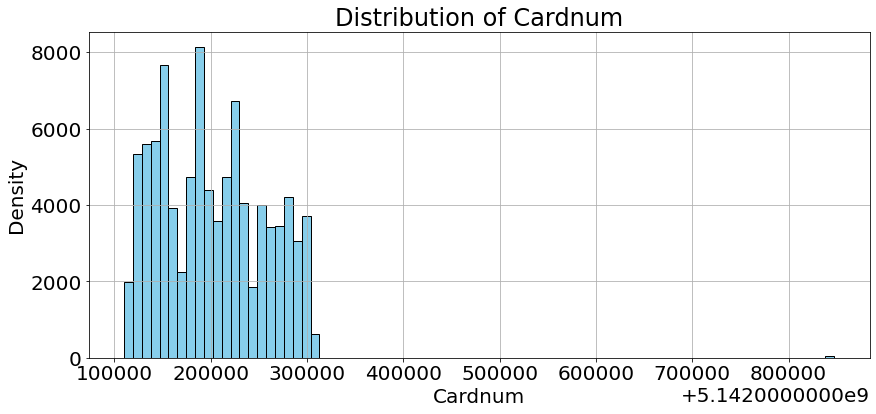

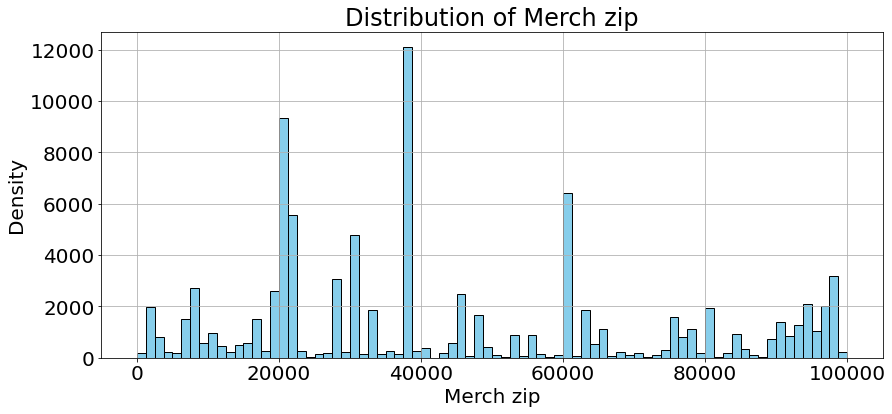

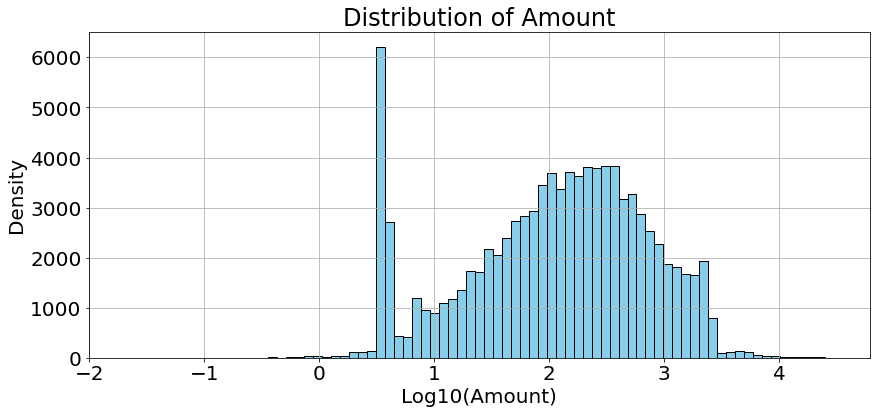

In [62]:
plt.rcParams.update({'figure.figsize':(14,6)})
plt.rcParams.update({'font.size':20})

# Columns to plot
numerics = ['Cardnum', 'Merch zip', 'Amount']
data = data.dropna(subset=['Merch zip']) # Remove missing values for plotting

# Plotting each numeric field
for col in numerics:
    plt.figure()
    if col == 'Amount':
        # Log transformation due to high skewness and outliers
        data_to_plot = np.log10(data[col] + 0.01)  # Adding 0.01 to handle zero amounts if any
        bins = np.linspace(np.min(data_to_plot), np.max(data_to_plot), 80)
        plt.hist(data_to_plot, bins=bins, color='skyblue', edgecolor='black')
        plt.xlabel(f'Log10({col})')
    else:
        # Regular histogram for Cardnum and Merch zip
        bins = 80  # Fixed number of bins
        plt.hist(data[col], bins=bins, color='skyblue', edgecolor='black')
        plt.xlabel(col)

    plt.ylabel('Density')
    plt.title(f'Distribution of {col}')
    plt.grid(True)
    plt.show()

In [63]:
# getting more info on categorical columns
print("Overview of categorical columns:")
for col in categoricals:
    print(f"\nColumn: {col}")
    print(f"Unique values: {data[col].nunique()}")
    print("Most common values:")
    print(data[col].value_counts().head(10))
    print("Number of missing values:", data[col].isnull().sum())

Overview of categorical columns:

Column: Date
Unique values: 365
Most common values:
2/28/10    634
8/10/10    598
3/15/10    571
9/13/10    548
8/9/10     521
9/14/10    519
9/21/10    513
9/7/10     512
8/1/10     508
8/31/10    498
Name: Date, dtype: int64
Number of missing values: 0

Column: Merchnum
Unique values: 12833
Most common values:
930090121224     9419
5509006296254    2150
602608969534     1108
4353000719908    1029
410000971343      990
9918000409955     968
5725000466504     884
9108234610000     834
9900020006406     801
602608969138      788
Name: Merchnum, dtype: int64
Number of missing values: 1858

Column: Merch description
Unique values: 12534
Most common values:
SIGMA-ALDRICH             1652
STAPLES #941              1194
FISHER SCI ATL            1109
MWI*MICRO WAREHOUSE        968
CDW*GOVERNMENT INC         884
DELL MARKETING L.P.        825
FISHER SCI CHI             788
GSA-FSS-ADV                775
AMAZON.COM  *SUPERSTOR     756
OFFICE DEPOT #1082       

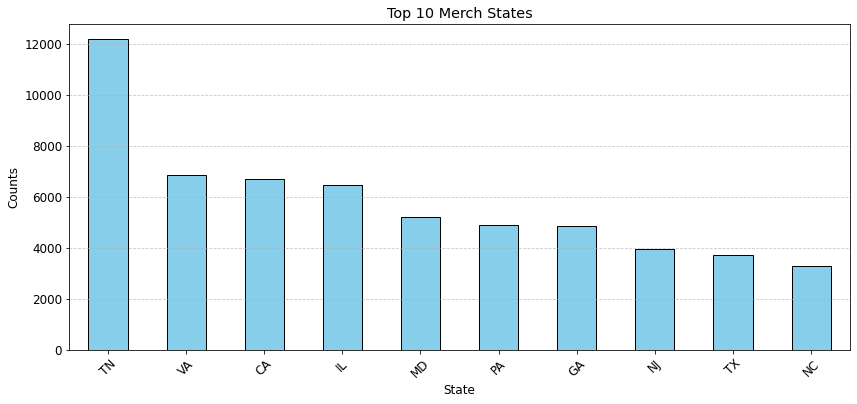

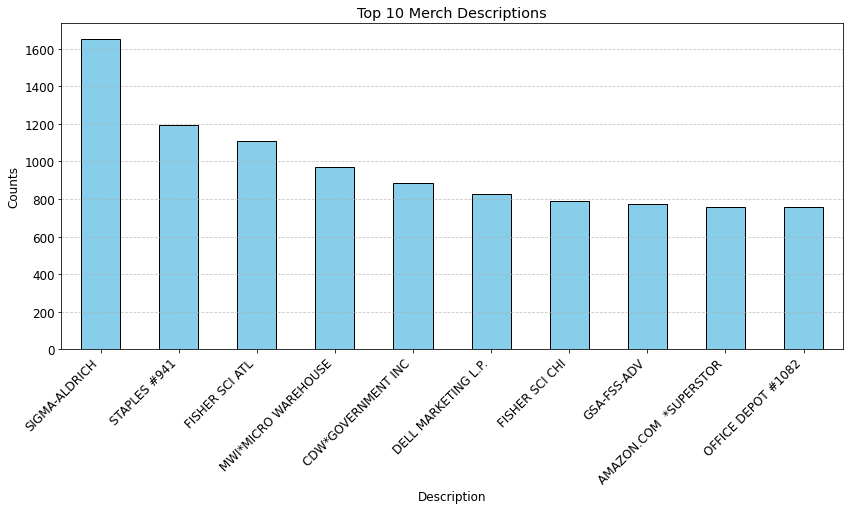

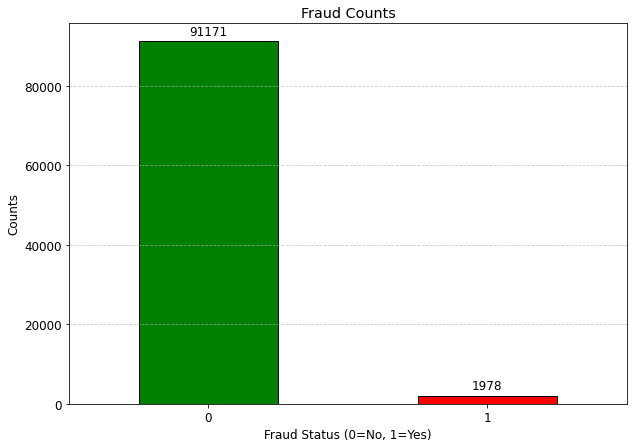

In [79]:
# plot categorical histograms if desired

plt.rcParams.update({'figure.figsize':(14,6), 'font.size':12})

# Plot for Merch state (top states)
top_states = data['Merch state'].value_counts().head(10)
top_states.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Top 10 Merch States')
plt.xlabel('State')
plt.ylabel('Counts')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Plot for Merch description (top descriptions)
top_descriptions = data['Merch description'].value_counts().head(10)
top_descriptions.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Top 10 Merch Descriptions')
plt.xlabel('Description')
plt.ylabel('Counts')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()



plt.figure(figsize=(10, 7))
fraud_counts = data['Fraud'].value_counts()
ax = fraud_counts.plot(kind='bar', color=['green', 'red'], edgecolor='black')
plt.title('Fraud Counts')
plt.xlabel('Fraud Status (0=No, 1=Yes)')
plt.ylabel('Counts')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Annotate counts above bars
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'),  # Format as an integer, removing the decimal part
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.show()

## The cell below is for supervised problem with a dependent variable y. It looks at the univariate relationship between x and y.

In [85]:
data['Transtype'].unique()

array(['P'], dtype=object)

overall response rate is:  0.021234795864689904
93149 different values for Recnum
1630 different values for Cardnum
365 different values for Date
12833 different values for Merchnum
12534 different values for Merch description


/var/folders/_2/j4tw5ld17zg7511fjc1w1lrc0000gn/T/ipykernel_57907/1635616917.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[dep_var].replace('no',0,inplace=True)
/var/folders/_2/j4tw5ld17zg7511fjc1w1lrc0000gn/T/ipykernel_57907/1635616917.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[dep_var].replace('yes',1,inplace=True)


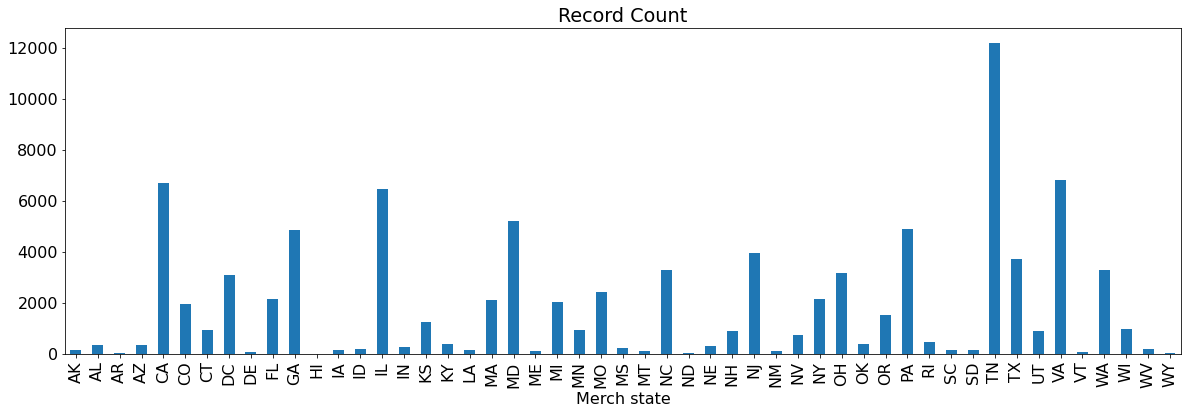

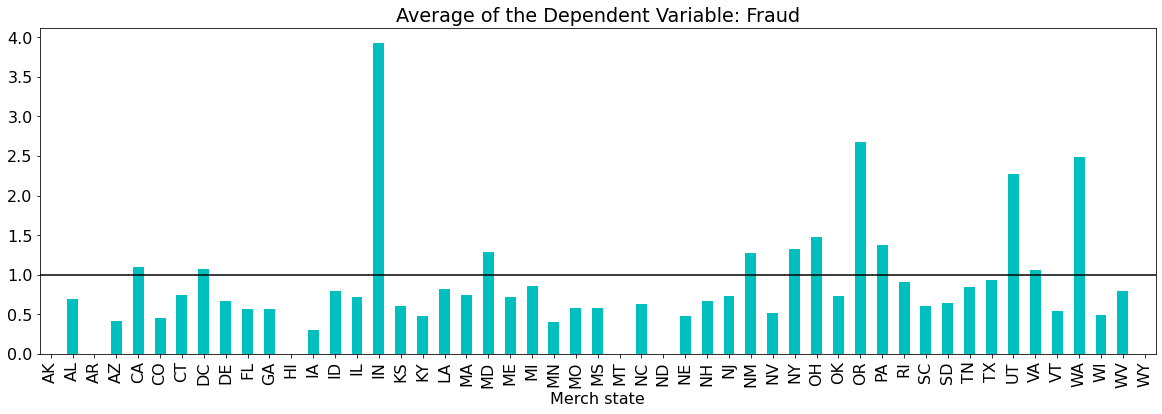

4567 different values for Merch zip


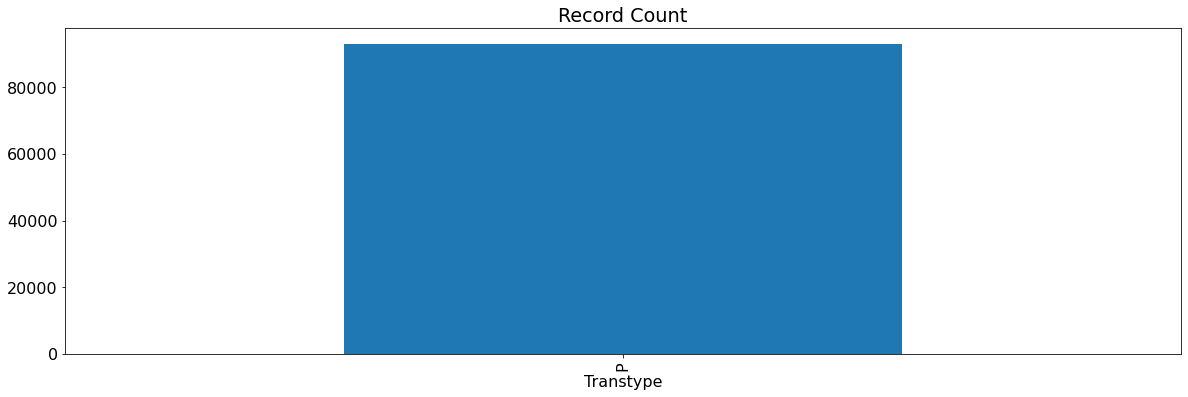

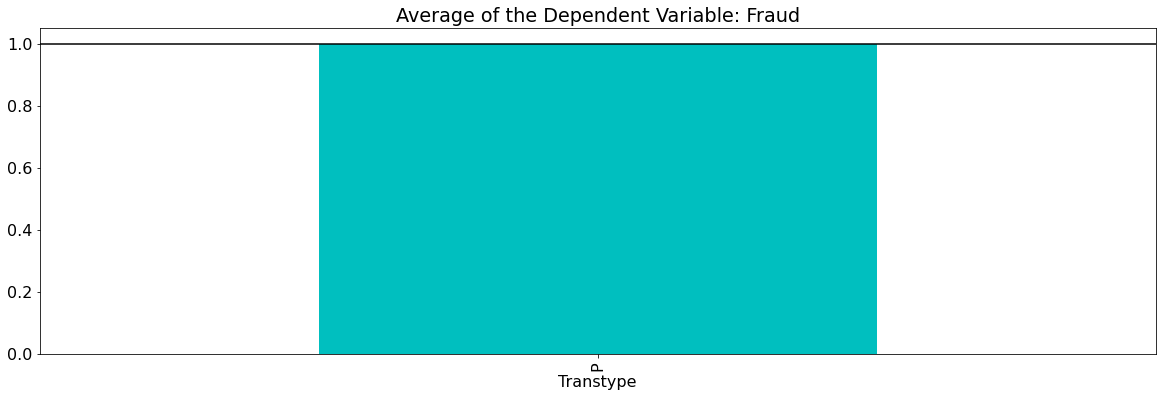

34765 different values for Amount


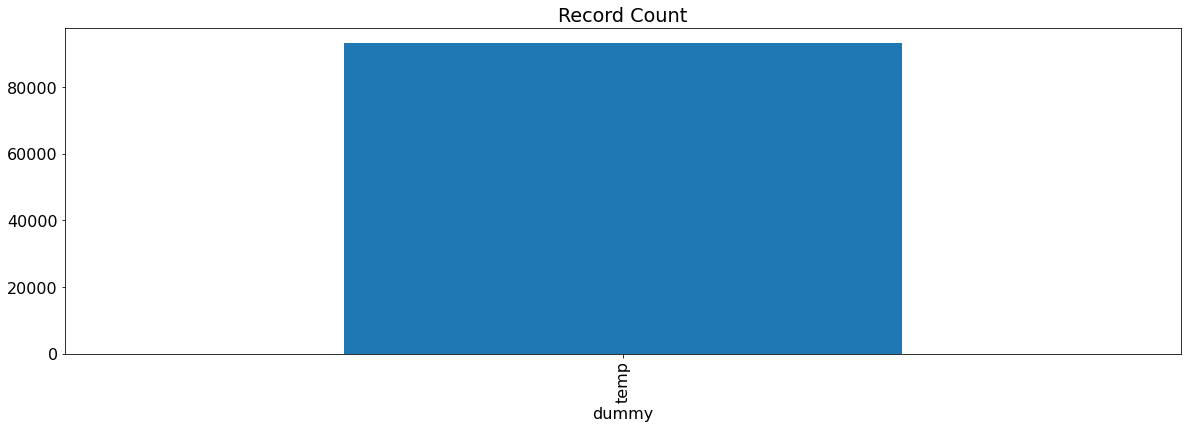

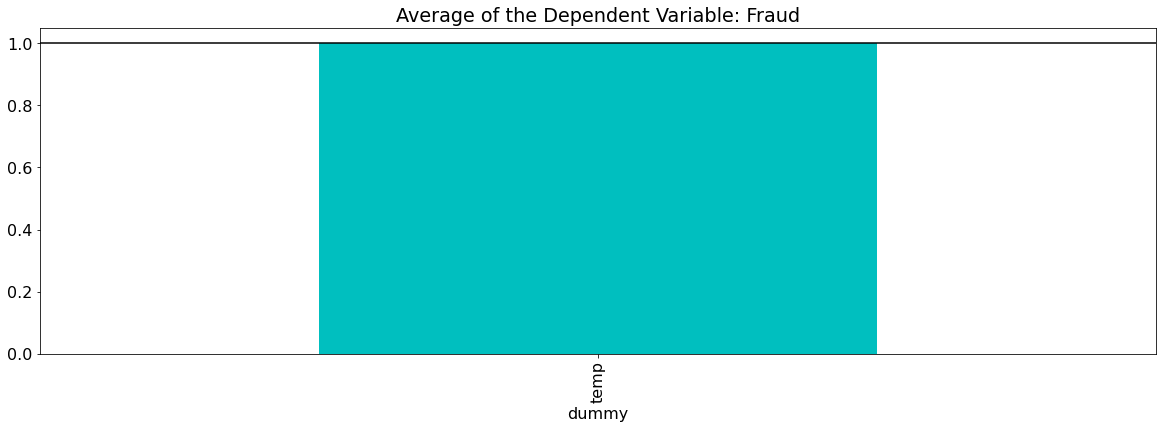

In [29]:
dep_var = 'Fraud'

# sometimes need to convert the dependent variable to a number:
data[dep_var].replace('no',0,inplace=True)
data[dep_var].replace('yes',1,inplace=True)

rate = data[dep_var].mean()

print('overall response rate is: ', rate)
# Plot field distributions and compare with average of the dependent variable y
plt.rcParams["figure.figsize"] = [20,6]
plt.rcParams.update({'font.size': 16})
plot_cols=data.columns.tolist()
plot_cols.remove(dep_var)
for col in plot_cols:
    num = data[col].nunique()
    if num > 100:
        print(num,"different values for",col)
    else:
        plt.title('Record Count')
        plt.xlabel(col)
        data[col].value_counts().sort_index().plot(kind='bar')
        temp = data.groupby(col)[dep_var].mean() / rate
        plt.show()
        plt.xlabel(col)
        str = 'Average of the Dependent Variable: '+dep_var
        plt.title(str)
        plt.axhline(1,color='black')
        temp.plot(kind='bar',color='c')
        plt.show()